In [1]:
import os
import glob
import json
import pandas as pd
import numpy as np
import requests
import re

os.environ['BEEP_ENV'] = 'dev'

Beep tutorial data examples

In [3]:
# Note: must change path variable
path = 'C:/Users/david/OneDrive/Documents/CalPoly/DATA/Capstone/TRI/'
df_example = pd.read_csv(path + 'Severson-et-al/2017-05-12_6C-50per_3_6C_CH36.csv')
df_example

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
0,0,0.0000,1.494646e+09,-1780.0032,0.0,0.0,0.000000,3.301788,0.000000,0.000000,0.000000,0.000000,-0.000015,0.022012,30.457119
1,1,0.0001,1.494646e+09,-1780.0031,0.0,0.0,0.000000,3.301788,0.000000,0.000000,0.000000,0.000000,-0.000015,0.022012,30.457119
2,2,9.9983,1.494646e+09,-1770.0049,0.0,0.0,0.000000,3.301751,0.000000,0.000000,0.000000,0.000000,-0.000027,0.022012,30.445261
3,3,20.0020,1.494646e+09,-1760.0012,0.0,0.0,0.000000,3.301784,0.000000,0.000000,0.000000,0.000000,-0.000015,0.022012,30.500921
4,4,30.0006,1.494646e+09,-1750.0026,0.0,0.0,0.000000,3.301804,0.000000,0.000000,0.000000,0.000000,-0.000009,0.022012,30.500921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919046,919046,335612.8656,1.497341e+09,1200.0007,10.0,876.0,-0.050411,2.000321,0.881207,0.879972,3.116403,2.537461,-0.000280,0.020926,31.069643
919047,919047,335612.9324,1.497341e+09,0.0067,11.0,876.0,-0.050411,2.003981,0.881207,0.879973,3.116403,2.537461,-0.000280,0.020926,31.069643
919048,919048,335612.9352,1.497341e+09,0.0095,11.0,876.0,0.000000,2.003981,0.881207,0.879973,3.116403,2.537461,-0.000280,0.020926,31.069643
919049,919049,454964.6140,1.497461e+09,119351.6883,11.0,876.0,0.000000,2.968700,0.881207,0.879973,3.116403,2.537461,-0.000280,0.000000,31.069643


In [4]:
df_example_meta = pd.read_csv(path + "Severson-et-al/2017-05-12_6C-50per_3_6C_CH36_Metadata.csv")
df_example_meta

,Unnamed: 0,test_id,device_id,iv_ch_id,first_start_datetime,resumed_times,last_resume_datetime,last_end_datetime,schedule_file_name,databases,...,has_aux,has_special,schedule_version,log_aux_data_flag,log_special_data_flag,rowstate,canconfig_filename,m_ncanconfigmd5,value,value2
0,0,167,60369369,35,1494645700,0,0,1497460865,2017-05-12_TESTS\20170512-6C-50PER_3_6C.SDU,"ArbinResult_6,ArbinResult_7,ArbinResult_8,Arbi...",...,3,0,Schedule Version 7.00.08,1,0,0,NaN,NaN,0.0,0.0


New battery_archive data

In [5]:
snl_path = 'E:/Data/TRI/SNL Data/'
df_cycle_a = pd.read_csv(snl_path + 'SNL_18650_LFP_15C_0-100_0.5-1C_a_cycle_data.csv')
df_cycle_a

,Cycle_Index,Start_Time,End_Time,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
0,1.0,2018-02-01 10:02:10.002962,2018-02-01 14:22:45.311114,1.564531e+04,-0.55,0.550,1.998,3.600,1.019,1.030,3.467,3.274
1,2.0,2018-02-01 14:22:45.342898,2018-02-01 18:40:11.752185,3.109175e+04,-0.55,0.550,1.995,3.600,1.037,1.032,3.509,3.281
2,3.0,2018-02-01 18:40:11.813887,2018-02-01 22:57:06.174243,4.650617e+04,-0.55,0.550,1.997,3.600,1.037,1.033,3.510,3.284
3,4.0,2018-02-01 22:57:06.174411,2018-02-02 05:26:31.589611,6.987159e+04,-1.10,0.550,1.995,3.600,2.075,2.065,7.016,6.418
4,5.0,2018-02-02 05:28:31.613008,2018-02-02 08:34:59.918204,8.117992e+04,-1.10,0.550,1.993,3.600,1.037,1.033,3.502,3.210
...,...,...,...,...,...,...,...,...,...,...,...,...
4545,4547.0,2020-02-15 04:06:24.151982,2020-02-15 06:54:33.186958,4.887246e+07,-1.10,0.549,1.996,3.600,0.950,0.945,3.187,2.966
4546,4548.0,2020-02-15 06:54:33.187104,2020-02-15 10:46:26.085202,4.888637e+07,-0.55,0.549,1.996,3.600,0.950,0.947,3.187,3.024
4547,4549.0,2020-02-15 10:46:26.114368,2020-02-15 14:39:26.674326,4.890035e+07,-0.55,0.549,1.998,3.600,0.952,0.947,3.199,3.024
4548,4550.0,2020-02-15 14:39:26.714271,2020-02-15 18:32:38.270088,4.891434e+07,-0.55,0.549,1.998,3.600,0.953,0.947,3.202,3.025


In [6]:
df_ts_a = pd.read_csv(snl_path + 'SNL_18650_LFP_15C_0-100_0.5-1C_a_timeseries.csv')
df_ts_a

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,2018-02-01 10:02:10.002962,1.000200e+01,1.0,0.0,2.940,0.0,0.0,0.0,0.0,15.163,15.375
1,2018-02-01 10:02:20.016433,2.001600e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.148,15.437
2,2018-02-01 10:02:30.031429,3.003100e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
3,2018-02-01 10:02:40.046426,4.004600e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.240,15.375
4,2018-02-01 10:02:50.061462,5.006100e+01,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
...,...,...,...,...,...,...,...,...,...,...,...
465880,2020-02-15 18:33:35.088926,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.319
465881,2020-02-15 18:33:36.108916,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.395
465882,2020-02-15 18:33:37.110896,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.395
465883,2020-02-15 18:33:38.130905,4.891440e+07,4551.0,0.0,2.648,0.0,0.0,0.0,0.0,15.030,15.319


Structuring from time series a

In [10]:
d_dir = "E:/Data/TRI/NewData/DeltaQFastCharge/"
t_dir = "E:/Data/TRI/NewData/TrajectoryFastCharge/"

In [11]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

In [12]:
d_list = getListOfFiles(d_dir)
print(len(d_list))
d_list

30


['E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH05_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH06_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH07_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH08_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH09_features_DeltaQFastCharge.json',


In [13]:
new_names = []
for file in d_list:
    new_names.append(re.findall("CH(.*?)\_f", file)[0])

In [14]:
d_df = pd.DataFrame()
for file in d_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        d_df = pd.concat([d_df,data_df])
d_df.reset_index(drop=True,inplace=True)
d_df['bat_num'] = new_names
d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.035],[1.032],[306697.58829142264],[5760.0],[-0.44680629485828904],...,[nan],[1.033],None,None,None,10,91,100,40,00
1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.04],[1.0430000000000001],[1.042],[296427.4028991698],[5785.60009765625],[-0.20877572651236104],...,[nan],[1.044],None,None,None,10,91,100,40,01
2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.0290000000000001],[1.03],[262556.75055948895],[5811.2001953125],[-0.19563143967312835],...,[nan],[1.031],None,None,None,10,91,100,40,02
3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.029],[1.0260000000000002],[1.025],[268508.7274637858],[5785.60009765625],[-0.6317302807027921],...,[nan],[1.028],None,None,None,10,91,100,40,03
4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.067],[1.074],[1.0590000000000002],[614925.4964558918],[5785.60009765625],[-0.1893985483034041],...,[nan],[1.067],None,None,None,10,91,100,40,04


In [15]:
t_list = getListOfFiles(t_dir)
print(len(t_list))
t_list

30


['E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH05_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH06_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH07_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH08_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/Trajec

In [16]:
t_df = pd.DataFrame()
for file in t_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        t_df = pd.concat([t_df,data_df])
t_df.reset_index(inplace=True)
t_df.head()

,index,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[4550.0],[4550.0],[4550.0],[4550.0],None,None,None,0.98,0.78,0.03
1,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[3552.0],[3552.0],[3552.0],[3552.0],[3552.0],None,None,None,0.98,0.78,0.03
2,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3760.0],[3760.0],[3760.0],[3760.0],None,None,None,0.98,0.78,0.03
3,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3753.0],[3753.0],[3753.0],[3753.0],None,None,None,0.98,0.78,0.03
4,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[207.0],[207.0],[207.0],[3049.0],[3049.0],[3049.0],[3049.0],None,None,None,0.98,0.78,0.03


In [17]:
df_full = d_df.merge(t_df, left_index=True, right_index=True)

# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

df_full.reset_index(inplace=True)
df_full

,level_0,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.035,1.032,306697.588291,5760.000000,...,4550.0,4550.0,4550.0,4550.0,None,None,None,0.98,0.78,0.03
1,1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.040,1.043,1.042,296427.402899,5785.600098,...,3552.0,3552.0,3552.0,3552.0,None,None,None,0.98,0.78,0.03
2,2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.029,1.030,262556.750559,5811.200195,...,3760.0,3760.0,3760.0,3760.0,None,None,None,0.98,0.78,0.03
3,3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.029,1.026,1.025,268508.727464,5785.600098,...,3753.0,3753.0,3753.0,3753.0,None,None,None,0.98,0.78,0.03
4,4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.067,1.074,1.059,614925.496456,5785.600098,...,3049.0,3049.0,3049.0,3049.0,None,None,None,0.98,0.78,0.03
5,5,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.032,1.032,1.029,460906.194088,5785.600098,...,3544.0,3544.0,3544.0,3544.0,None,None,None,0.98,0.78,0.03
6,6,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.035,1.038,1.035,460296.723763,5785.600098,...,3547.0,3547.0,3547.0,3547.0,None,None,None,0.98,0.78,0.03
7,7,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.050,1.048,1.048,457406.060653,5785.600098,...,3037.0,3037.0,3037.0,3037.0,None,None,None,0.98,0.78,0.03
8,8,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.049,1.048,1.047,467247.932532,5785.600098,...,3037.0,3037.0,3037.0,3037.0,None,None,None,0.98,0.78,0.03
9,9,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.036,1.027,1.030,394481.761096,5811.200195,...,3543.0,3543.0,3543.0,3543.0,None,None,None,0.98,0.78,0.03


In [18]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100']
#                        'X.min_internal_resistance_cycles_2:100',
#                        'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

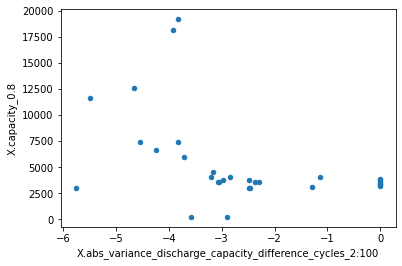

In [20]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [29]:
# Variance model
X_train_var = df_full[[variance_model_features]]
y_train_var = df_full[[y]]

reg_var = LinearRegression().fit(X_train_var,y_train_var)
y_pred_train_var = reg_var.predict(X_train_var)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train_var, y_pred_train_var)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train_var, y_pred_train_var))
print("R2 :", r2_score(y_train_var, y_pred_train_var))

Training RMSE:  3959.7862621076315
Mean % Train Error:  2.283313939099965
R2 : 0.18462875166622672


In [30]:
# discharge model
X_train_dis = df_full[discharge_model_features].dropna()
X_train_dis_index = list(X_train_dis.index.values)
y_train_dis = df_full.iloc[X_train_dis_index][[y]]

reg_dis = LinearRegression().fit(X_train_dis,y_train_dis)
y_pred_train_dis = reg_dis.predict(X_train_dis)

print("training RMSE: ", np.sqrt(mean_squared_error(y_train_dis, y_pred_train_dis)))
print("Mean % train Error: ", mean_absolute_percentage_error(y_train_dis, y_pred_train_dis))
print("R2 :", r2_score(y_train_dis, y_pred_train_dis))

training RMSE:  758.9294510432505
Mean % train Error:  0.7871161512464375
R2 : 0.4946459742105431


In [31]:
# full model
X_train_full = df_full[full_model_features]
X_train_full = X_train_full.replace([np.inf, -np.inf], np.nan)
X_train_full = X_train_full.dropna()
X_train_full_index = list(X_train_full.index.values)
y_train_full = df_full.iloc[X_train_full_index][[y]]

reg_full = LinearRegression().fit(X_train_full,y_train_full)
y_pred_train_full = reg_full.predict(X_train_full)

print("training RMSE: ", np.sqrt(mean_squared_error(y_train_full, y_pred_train_full)))
print("Mean % train Error: ", mean_absolute_percentage_error(y_train_full, y_pred_train_full))
print("R2 :", r2_score(y_train_full, y_pred_train_full))

training RMSE:  702.9232825782003
Mean % train Error:  0.6471510631390093
R2 : 0.9297985519947899


In [24]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Variance Model Predicted vs. True Values')

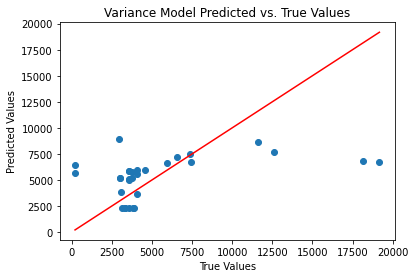

In [111]:
# variance model
min_var = y_train_var.min()[0]
max_var = y_train_var.max()[0]

plt.scatter(y_train_var, y_pred_train_var)
plt.plot([min_var, max_var], [min_var, max_var], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Variance Model Predicted vs. True Values")

Text(0.5, 1.0, 'Discharge Model Predicted vs. True Values')

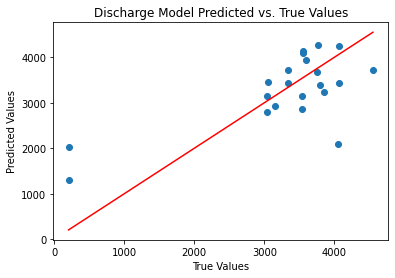

In [112]:
# discharge model
min_dis = y_train_dis.min()[0]
max_dis = y_train_dis.max()[0]

plt.scatter(y_train_dis, y_pred_train_dis)
plt.plot([min_dis, max_dis], [min_dis, max_dis], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Discharge Model Predicted vs. True Values")

Text(0.5, 1.0, 'Full Model Predicted vs. True Values')

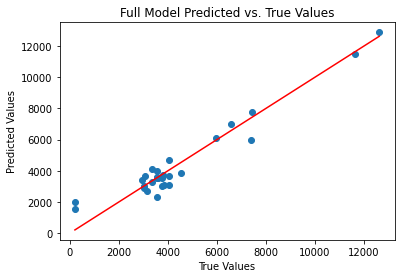

In [113]:
# full model
min_full = y_train_full.min()[0]
max_full = y_train_full.max()[0]

plt.scatter(y_train_full, y_pred_train_full)
plt.plot([min_full, max_full], [min_full, max_full], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Full Model Predicted vs. True Values")

Text(0.5, 1.0, 'Frequency of X.capacity_0.8')

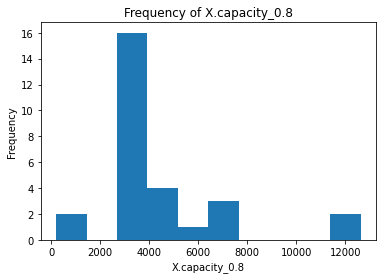

In [110]:
plt.hist(y_train_full)
plt.xlabel('X.capacity_0.8')
plt.ylabel('Frequency')
plt.title('Frequency of X.capacity_0.8')